# Importing Necessary Libraries

In [1]:
import sys
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import seaborn as sns
import matplotlib.pyplot as plt

# Scraping all the reviews from website

In [2]:
all_reviews = []

for k in range(1, 8):  # Loop from 1 to 7 inclusive
    try:
        url = f'https://www.airlinequality.com/airline-reviews/airlink/page/{k}/'
        page = requests.get(url)  # Make the request to the URL
        
        if page.status_code != 200:
            raise Exception(f"Error fetching page {k}: Status code {page.status_code}")
    
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()
        print('ERROR FOR LINK:', url)
        print(error_type, 'Line:', error_info.tb_lineno)
        continue  # Skip to the next iteration if there's an error
    
    time.sleep(2)
    
    bsoup1 = BeautifulSoup(page.text, 'html.parser')
    revpage = bsoup1.find_all('div', class_='text_content')
    
    for review in revpage:
        reviews = review.get_text(strip=True)
        all_reviews.append(reviews)

# Print the collected reviews
for idx, review in enumerate(all_reviews, 1):
    print(f"Review {idx}: {review}\n")

Review 1: ✅Trip Verified|  Airlink do so much right and so many other carriers in the region can learn from them. Reliably on time (91% on time across all their flights into Jo'burg for example), great convenient connections through OR Tambo, Johannesburg for regional Southern Africa departures onto domestic SA ones; generous baggage allowance (30kg per passenger from Lusaka to SA), ever smiling welcoming cabin crew and check-in staff (on 4 sectors without exception); coupled with tasty cold meals on intl sectors and good South African wines and juices on all really help them to stand out alongside now even a loyalty rewards program. Keep doing what you do Airlink - we are so grateful and you will be rewarded with custom.

Review 2: ✅Trip Verified|  My group of 6 checked in today but only 4 boarding passes were issued together with 2 payment requests for 3 kg excessive weight without telling us that two of our luggage’s were over 20kg or giving us a choice of removing some and putting 

# Converting the reviews into dataframe

In [3]:
# Create a DataFrame from the collected reviews
df = pd.DataFrame(all_reviews, columns=["Review"])

# Optional: Save to CSV
#df.to_csv("reviews.csv", index=False)
# Print the DataFrame to verify
df.head(5)

,Review
0,✅Trip Verified| Airlink do so much right and ...
1,✅Trip Verified| My group of 6 checked in toda...
2,✅Trip Verified| I was super impressed with th...
3,✅Trip Verified| If you have another option of ...
4,"Not Verified| Nice flight, on time. Smooth c..."


# Manipulating and cleaning the data

In [5]:
df_loaded = pd.read_csv("D:\\Career\\Web Scrapping Great learning\\reviews.csv")

# Check if the number of reviews matches
if len(df) == len(df_loaded):
    print("All reviews are saved correctly.")
else:
    print(f"Mismatch in number of reviews: saved {len(df_loaded)} reviews, expected {len(df)} reviews.")

All reviews are saved correctly.


In [6]:
df['Review'] = df['Review'].str.replace(r'.*Verified\| ', '', regex=True)
df.head(10)

,Review
0,Airlink do so much right and so many other ca...
1,My group of 6 checked in today but only 4 boa...
2,I was super impressed with this airline. High...
3,If you have another option of airline like Cem...
4,"Nice flight, on time. Smooth check in. Nice ..."
5,"Not Verified| It's unbelievable, I booked a ..."
6,I recently had the opportunity to fly with Air...
7,This was a connecting flight completing an ov...
8,Our flight was rerouted to JNB due to bad wea...
9,Plane was clean and tidy but starting to look...


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Review    0
dtype: int64

# Sentiment Analysis

In [9]:
!pip install textblob

## Importing necessary libraries 

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from tqdm.notebook import tqdm
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
df['ID'] = pd.NA
df["REVIEWS"] = df['Review']
df['POSITIVE_SCORE'] = pd.NA
df['NEGATIVE_SCORE'] = pd.NA
df['SENTIMENT'] = pd.NA
df['SUBJECTIVITY_SCORE'] = pd.NA

In [12]:
df = df.drop(columns=['Review'])
df.head(5)

,ID,REVIEWS,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE
0,<NA>,Airlink do so much right and so many other ca...,<NA>,<NA>,<NA>,<NA>
1,<NA>,My group of 6 checked in today but only 4 boa...,<NA>,<NA>,<NA>,<NA>
2,<NA>,I was super impressed with this airline. High...,<NA>,<NA>,<NA>,<NA>
3,<NA>,If you have another option of airline like Cem...,<NA>,<NA>,<NA>,<NA>
4,<NA>,"Nice flight, on time. Smooth check in. Nice ...",<NA>,<NA>,<NA>,<NA>


In [13]:
# Download stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Define regex pattern to match unwanted characters
pattern = r'[^A-Za-z\s]+'

# Create empty output dataframe
output_df = pd.DataFrame(columns=["ID", "REVIEWS", "POSITIVE_SCORE", "NEGATIVE_SCORE", "SENTIMENT", "SUBJECTIVITY_SCORE"])

# Loop through rows of input dataframe
for index, row in df.iterrows():
    ID = row["ID"]
    REVIEWS = row["REVIEWS"]

        # Apply regex to remove unwanted characters
    cleaned_text = re.sub(pattern, ' ', REVIEWS)

        # Tokenize text into words
    words = nltk.word_tokenize(cleaned_text)
     
    # Remove stopwords and lowercase
    words = [word.lower() for word in words if word.lower() not in stop_words]

        # Join words back into cleaned text
    cleaned_text = ' '.join(words)

    # Get polarity scores for cleaned text
    scores = vader.polarity_scores(cleaned_text)
    
    # Add compound score to scores dictionary
    scores["compound"] = scores["pos"] - scores["neg"]

            # To get the subjectivity scores
    blob = TextBlob(cleaned_text)
    polarity_score = blob.sentiment.polarity
    subjectivity_score = blob.sentiment.subjectivity

    # Append results to output dataframe
    output_df = pd.concat([output_df, pd.DataFrame({"ID": ID, "REVIEWS": REVIEWS, "POSITIVE_SCORE": scores["pos"], 
                                  "NEGATIVE_SCORE": scores["neg"], "SENTIMENT": scores["compound"],
                                  "SUBJECTIVITY_SCORE": subjectivity_score}, index=[0])])
    

[nltk_data] Downloading package stopwords to C:\Users\KRISHNENDU
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\KRISHNENDU
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\KRISHNENDU
[nltk_data]     DUTTA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
output_df["ID"]=range(1,67)
output_df.head(5)

,ID,REVIEWS,POSITIVE_SCORE,NEGATIVE_SCORE,SENTIMENT,SUBJECTIVITY_SCORE
0,1,Airlink do so much right and so many other ca...,0.348,0.000,0.348,0.409524
0,2,My group of 6 checked in today but only 4 boa...,0.058,0.090,-0.032,1.000000
0,3,I was super impressed with this airline. High...,0.578,0.000,0.578,0.749259
0,4,If you have another option of airline like Cem...,0.112,0.087,0.025,0.261905
0,5,"Nice flight, on time. Smooth check in. Nice ...",0.194,0.076,0.118,0.580000


In [15]:
output_df.shape

(66, 6)

<Axes: xlabel='SENTIMENT', ylabel='Count'>

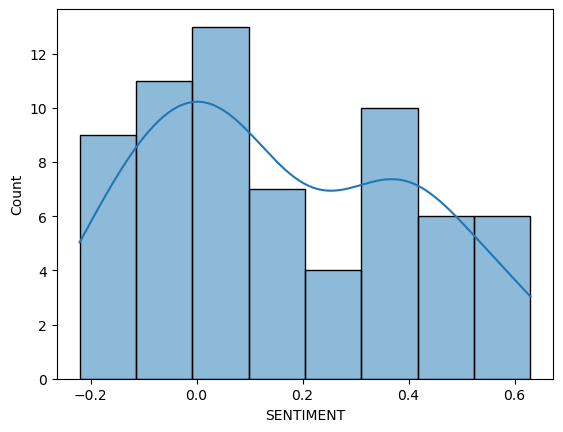

In [16]:
sns.histplot(output_df['SENTIMENT'],kde=True)

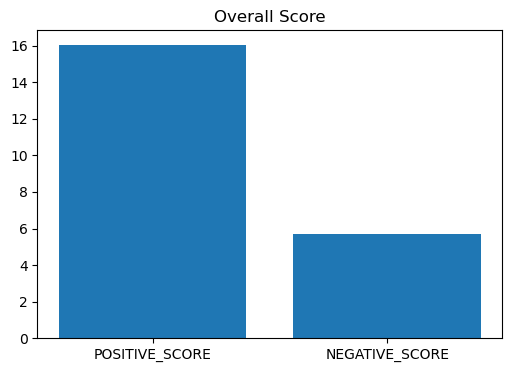

In [18]:
positive_sum=output_df['POSITIVE_SCORE'].sum()
negative_sum=output_df['NEGATIVE_SCORE'].sum()

#Bar Chart creation
plt.figure(figsize=(6,4))
plt.title('Overall Score')
plt.bar(['POSITIVE_SCORE','NEGATIVE_SCORE'],[positive_sum,negative_sum])
plt.show()

In [20]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 330.3 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 908.0 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/300.2 kB 983.0 kB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.0 MB/s eta 0:00:01
   --

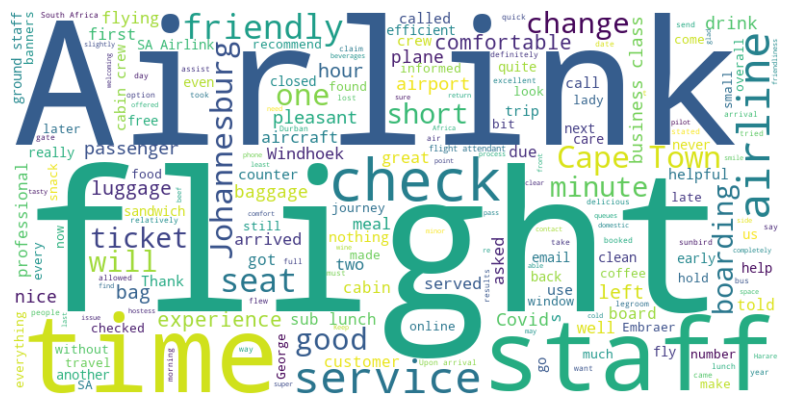

In [22]:
from wordcloud import WordCloud

#filter the reviews with positive scores
positive_reviews=output_df[output_df['POSITIVE_SCORE']>output_df['NEGATIVE_SCORE']]

#Concatination of all positive revies to a single string
positive_text=' '.join(review for review in positive_reviews['REVIEWS'])

#creation of word cloud object with positive reviews on it
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10,5))
plt.imshow(positive_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

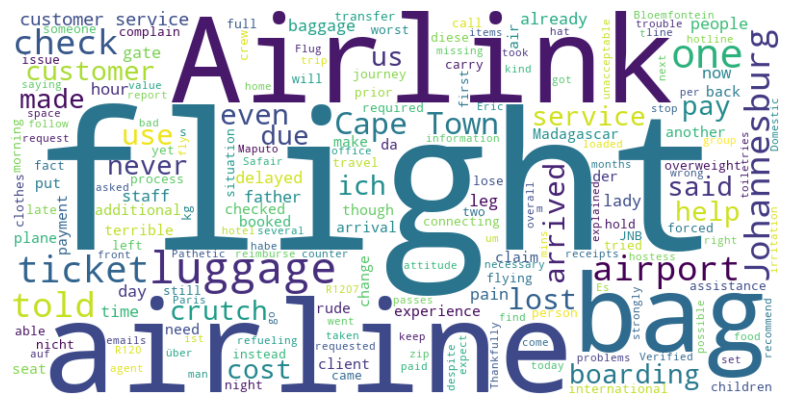

In [23]:
#filter the reviews with positive scores
negative_reviews=output_df[output_df['NEGATIVE_SCORE']>output_df['POSITIVE_SCORE']]

#Concatination of all positive revies to a single string
negative_text=' '.join(review for review in negative_reviews['REVIEWS'])

#creation of word cloud object with positive reviews on it
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10,5))
plt.imshow(negative_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()